Importing Libraries

In [110]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib

In [111]:
url="http://bit.ly/drinksbycountry"
pd.read_table(url,sep=',')


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,South America
189,Vietnam,111,2,1,2.0,Asia
190,Yemen,6,0,0,0.1,Asia
191,Zambia,32,19,4,2.5,Africa


In [112]:
#pd.read_csv('C:/Users/Admin/Downloads/beer-servings.csv')
pd.read_csv(r'C:\Users\Admin\Downloads\beer-servings.csv')

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,1,Albania,89.0,132.0,54.0,4.9,Europe
2,2,Algeria,25.0,0.0,14.0,0.7,Africa
3,3,Andorra,245.0,138.0,312.0,12.4,Europe
4,4,Angola,217.0,57.0,45.0,5.9,Africa
...,...,...,...,...,...,...,...
188,188,Venezuela,NaN,100.0,3.0,7.7,South America
189,189,Vietnam,111.0,2.0,1.0,2.0,Asia
190,190,Yemen,6.0,0.0,0.0,0.1,Asia
191,191,Zambia,32.0,19.0,4.0,2.5,Africa


In [103]:
#data.drop('Unnamed: 0', axis=1, inplace=True)
#data.head()

In [104]:
data=pd.read_csv((r'C:\Users\Admin\Downloads\beer-servings.csv'),index_col= 'Unnamed: 0')
data.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,Albania,89.0,132.0,54.0,4.9,Europe
2,Algeria,25.0,0.0,14.0,0.7,Africa
3,Andorra,245.0,138.0,312.0,12.4,Europe
4,Angola,217.0,57.0,45.0,5.9,Africa


In [113]:
data.shape

(193, 6)

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 185 non-null    float64
 2   spirit_servings               185 non-null    float64
 3   wine_servings                 187 non-null    float64
 4   total_litres_of_pure_alcohol  192 non-null    float64
 5   continent                     193 non-null    object 
dtypes: float64(4), object(2)
memory usage: 10.6+ KB


In [106]:
#data.isnull().sum()
data.isna().sum()

country                         0
beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

FILLING MISSING VALUES


In [115]:
data.dtypes

country                          object
beer_servings                   float64
spirit_servings                 float64
wine_servings                   float64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [116]:
data.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [117]:
num_cols=data[['beer_servings','spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol']]
num_cols.isna().sum()

beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
dtype: int64

In [118]:
from sklearn.impute import SimpleImputer

In [119]:
imputer=SimpleImputer(missing_values=np.nan, strategy='mean')
imputer=imputer.fit(num_cols)
num_cols=imputer.transform(num_cols)

In [120]:
type(num_cols)

numpy.ndarray

In [121]:
num_cols=pd.DataFrame(num_cols,columns=[['beer_servings','spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol']])

In [122]:
type(num_cols)

pandas.core.frame.DataFrame

In [123]:
num_cols.isna().sum()

beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
dtype: int64

In [124]:
data.isna().sum()

country                         0
beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

In [125]:
data.drop(['beer_servings','spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol'],axis=1, inplace=True)

In [126]:
data.head()

,country,continent
0,Afghanistan,Asia
1,Albania,Europe
2,Algeria,Africa
3,Andorra,Europe
4,Angola,Africa


In [127]:
data=pd.concat([num_cols,data],axis=1)
data.head()

,"(beer_servings,)","(spirit_servings,)","(wine_servings,)","(total_litres_of_pure_alcohol,)",country,continent
0,0.0,0.0,0.0,0.0,Afghanistan,Asia
1,89.0,132.0,54.0,4.9,Albania,Europe
2,25.0,0.0,14.0,0.7,Algeria,Africa
3,245.0,138.0,312.0,12.4,Andorra,Europe
4,217.0,57.0,45.0,5.9,Angola,Africa


In [128]:
data.isna().sum()

(beer_servings,)                   0
(spirit_servings,)                 0
(wine_servings,)                   0
(total_litres_of_pure_alcohol,)    0
country                            0
continent                          0
dtype: int64

In [129]:
data=pd.read_csv((r'C:\Users\Admin\Downloads\beer-servings.csv'),index_col= 'Unnamed: 0')
data.isna().sum()

country                         0
beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

METHOD 2

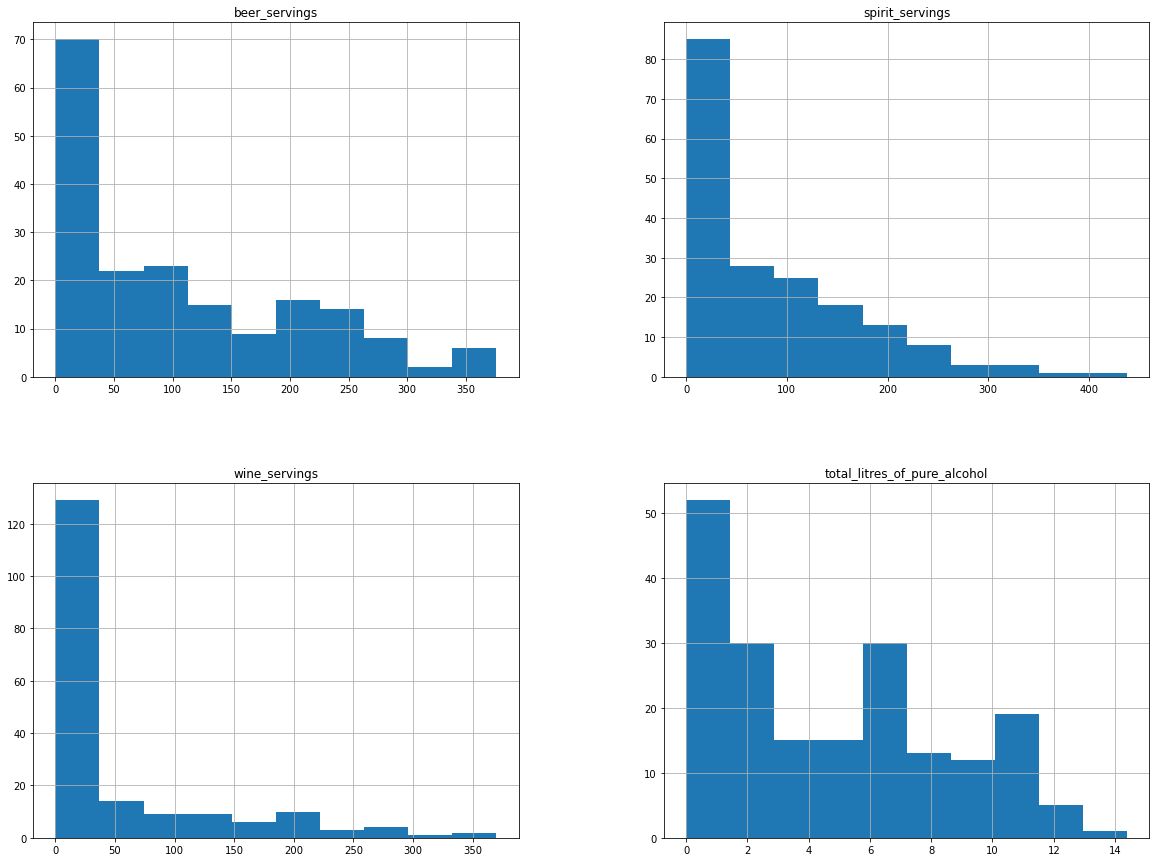

In [130]:
freqgraph=data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15))
plt.show()

In [131]:
data.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [132]:
data['beer_servings']=data['beer_servings'].fillna(data['beer_servings'].median())
data['beer_servings'].isna().sum()

0

In [133]:
for i in ['spirit_servings', 'wine_servings','total_litres_of_pure_alcohol']:
    data[i]=data[i].fillna(data[i].median())

In [134]:
data.isnull().sum()

country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent                       0
dtype: int64

MANAGING OUTLIERS

Text(0.5, 1.0, 'Boxplot of Beer Servings')

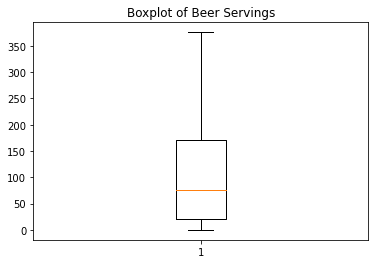

In [135]:
plt.boxplot(data['beer_servings'])
plt.title('Boxplot of Beer Servings')

Text(0.5, 1.0, 'Boxplot of Spirit')

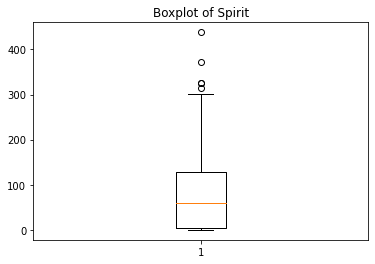

In [136]:
plt.boxplot(data['spirit_servings'])
plt.title('Boxplot of Spirit')

In [137]:
Q1=np.percentile(data['spirit_servings'],25,interpolation='midpoint')
Q2=np.percentile(data['spirit_servings'],50,interpolation='midpoint')
Q3=np.percentile(data['spirit_servings'],75,interpolation='midpoint')

In [138]:
print(Q1)
print(Q2)
print(Q3)

5.0
60.0
128.0


In [139]:
data['spirit_servings'].median()

60.0

In [140]:
IQR=Q3-Q1
print(IQR)

123.0


In [141]:
low_limit=Q1-1.5*IQR
upp_limit=Q3+1.5*IQR
print(low_limit)
print(upp_limit)

-179.5
312.5


In [142]:
outlier=[]
for x in data['spirit_servings']:
    if((x>upp_limit) or (x<low_limit)):
        outlier.append(x)

In [143]:
outlier

[373.0, 438.0, 326.0, 326.0, 315.0]

In [152]:
ind=data['spirit_servings']>upp_limit
data.loc[ind].index

Int64Index([15, 68, 73, 141, 144], dtype='int64')

In [60]:
#data.drop([15, 68, 73, 141, 144],inplace=True)

In [146]:
#data.head(20)

In [ ]:
Finding outlier of Wine servings

Text(0.5, 1.0, 'Boxplot of Wine Servings')

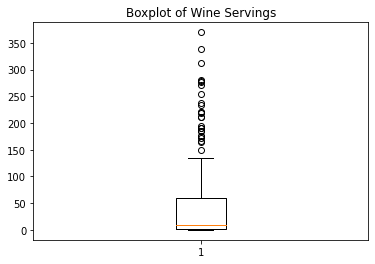

In [157]:
plt.boxplot(data['wine_servings'])
plt.title('Boxplot of Wine Servings')

In [158]:
Q1=np.percentile(data['wine_servings'],25,interpolation='midpoint')
Q2=np.percentile(data['wine_servings'],50,interpolation='midpoint')
Q3=np.percentile(data['wine_servings'],75,interpolation='midpoint')

In [160]:
print(Q1)
print(Q2)
print(Q3)

1.0
9.0
59.0


In [155]:
data['wine_servings'].median()

9.0

In [156]:
IQR=Q3-Q1
print(IQR)

58.0


In [92]:
low_limit=Q1-1.5*IQR
upp_limit=Q3+1.5*IQR
print(low_limit)
print(upp_limit)

-83.75
142.25


In [93]:
outlier=[]
for x in data['wine_servings']:
    if((x>upp_limit) or (x<low_limit)):
        outlier.append(x)

In [94]:
outlier

[312.0,
 221.0,
 212.0,
 191.0,
 212.0,
 172.0,
 254.0,
 278.0,
 233.0,
 370.0,
 149.0,
 175.0,
 218.0,
 185.0,
 165.0,
 237.0,
 271.0,
 190.0,
 175.0,
 339.0,
 167.0,
 276.0,
 186.0,
 280.0,
 195.0,
 220.0]

In [95]:
ind=data['wine_servings']>upp_limit
data.loc[ind].index

Int64Index([  3,   6,   8,   9,  16,  35,  42,  48,  55,  61,  64,  65,  67,
             75,  81,  83,  99, 120, 121, 136, 140, 156, 165, 166, 182, 185],
           dtype='int64')

Text(0.5, 1.0, 'Boxplot of Total Litres of Pure Alcohol')

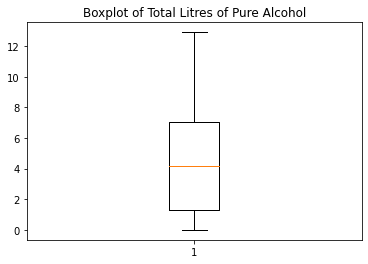

In [79]:
plt.boxplot(data['total_litres_of_pure_alcohol'])
plt.title('Boxplot of Total Litres of Pure Alcohol')

There is no outliers ..but we are checking through other method also..

In [71]:
Q1=np.percentile(data['total_litres_of_pure_alcohol'],25,interpolation='midpoint')
Q2=np.percentile(data['total_litres_of_pure_alcohol'],50,interpolation='midpoint')
Q3=np.percentile(data['total_litres_of_pure_alcohol'],75,interpolation='midpoint')

In [72]:
print(Q1)
print(Q2)
print(Q3)

1.25
4.2
7.05


In [73]:
data['total_litres_of_pure_alcohol'].median()

4.2

In [74]:
IQR=Q3-Q1
print(IQR)

5.8


In [75]:
low_limit=Q1-1.5*IQR
upp_limit=Q3+1.5*IQR
print(low_limit)
print(upp_limit)

-7.449999999999999
15.75


In [80]:
outlier=[]
for x in data['total_litres_of_pure_alcohol']:
    if((x>upp_limit) or (x<low_limit)):
        outlier.append(x)

In [81]:
outlier

[]

THERE IS NO OUTLIER FOR total_litres_of_pure_alcohol